# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

c:\Users\yashy\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading the Database

In [2]:
df = pd.read_csv('./data/diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
df.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

# Cleaning

In [10]:
df.corr().style.background_gradient(cmap='BuGn')  # Correlation Matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
df.drop(['BloodPressure', 'SkinThickness'], axis=1, inplace=True)  # Dropping irrelevant columns

Dropping 'BloodPressure' and 'SkinThickness' columns because of their weak correlation with the 'outcome' variable

In [12]:
df.isna().sum()

Pregnancies    0
Glucose        0
Insulin        0
BMI            0
Pedigree       0
Age            0
Outcome        0
dtype: int64

No null values

# EDA

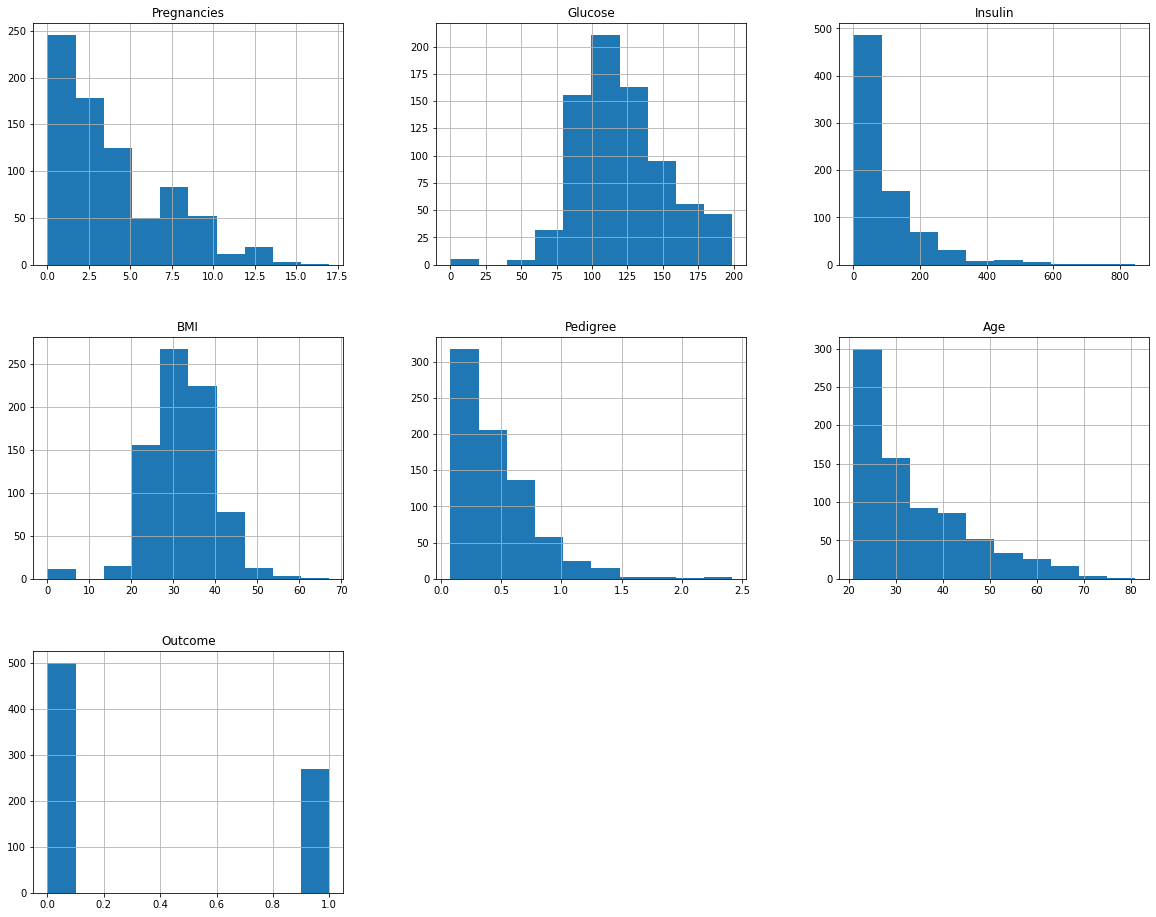

In [13]:
hist = df.hist(figsize=(20,16))  # Plotting Histograms
plt.show()

# Separating the Features and the Labels

In [14]:
X=df.iloc[:, :df.shape[1]-1]

y=df.iloc[:, -1]

X.shape, y.shape

((768, 6), (768,))

# Splitting the Dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling

In [16]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

This code is using the StandardScaler from scikit-learn to standardize (normalize) the feature data in a machine learning dataset, separately for the training and testing sets

# KNN Model

In [17]:
scores = []
for k in range(1,21):
    knn = KNeighborsClassifier(k).fit(X_train, y_train)  # Training mode for each value of k
    scores.append(knn.score(X_train, y_train))  # Adding score of each k to scores list

This loop will tell us which k value is giving us best accuracy in the range (1-20)

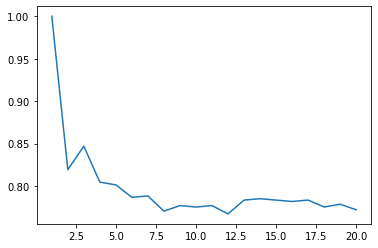

In [18]:
plt.plot(np.arange(1,21), scores)  # Plotting: k vs score
plt.show()

Observation : k = 3, gives the highest accuracy

In [19]:
def knn(X_train, X_test, y_train, y_test, k):  # Function to perform all tasks
    
    knn_model = KNeighborsClassifier(n_neighbors=k)  # KNN Model
    
    knn_model.fit(X_train, y_train)  # Training Model
    y_pred=knn_model.predict(X_test) # Making predictions
    
    print(f"Accuracy \t: {accuracy_score(y_test, y_pred)}")  # Accuracy
    print()
    
    cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix
    print("Confusion Matrix")
    print(cm)
    print()
    
    cr = classification_report(y_test, y_pred)  # Classification Report
    print('Classification report : \n', cr)

# Results 

In [20]:
k = 3

In [21]:
knn(X_train, X_test, y_train, y_test, k)  

Accuracy 	: 0.7207792207792207

Confusion Matrix
[[85 22]
 [21 26]]

Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       107
           1       0.54      0.55      0.55        47

    accuracy                           0.72       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.72      0.72      0.72       154

